**Рассмотрим простую сверточную нейронную модель, исследуем оптимальную глубины (2, 4, 6 слоев),**\
**измерим время обучения и построим графики зависимости loss и accuracy.**\
**Обучение происходит на 5 эпохах.Графики сохранены в "plots\simple_cnn\depth"**


==== Запуск simple с глубиной 2 ====


100%|██████████| 16/16 [00:01<00:00, 11.24it/s]


Epoch 1/5:
Train Loss: 46.6334, Train Acc: 0.1302
Test Loss: 14.6032, Test Acc: 0.2300
--------------------------------------------------


100%|██████████| 16/16 [00:01<00:00, 12.93it/s]


Epoch 2/5:
Train Loss: 5.1507, Train Acc: 0.4332
Test Loss: 4.0276, Test Acc: 0.3400
--------------------------------------------------


100%|██████████| 16/16 [00:01<00:00, 10.78it/s]


Epoch 3/5:
Train Loss: 1.1171, Train Acc: 0.7148
Test Loss: 3.1266, Test Acc: 0.3700
--------------------------------------------------


100%|██████████| 16/16 [00:01<00:00, 11.70it/s]


Epoch 4/5:
Train Loss: 0.6053, Train Acc: 0.8346
Test Loss: 3.5642, Test Acc: 0.3520
--------------------------------------------------


100%|██████████| 16/16 [00:01<00:00, 11.92it/s]


Epoch 5/5:
Train Loss: 0.4186, Train Acc: 0.8856
Test Loss: 3.5085, Test Acc: 0.3480
--------------------------------------------------
Время обучения: 362.68 сек


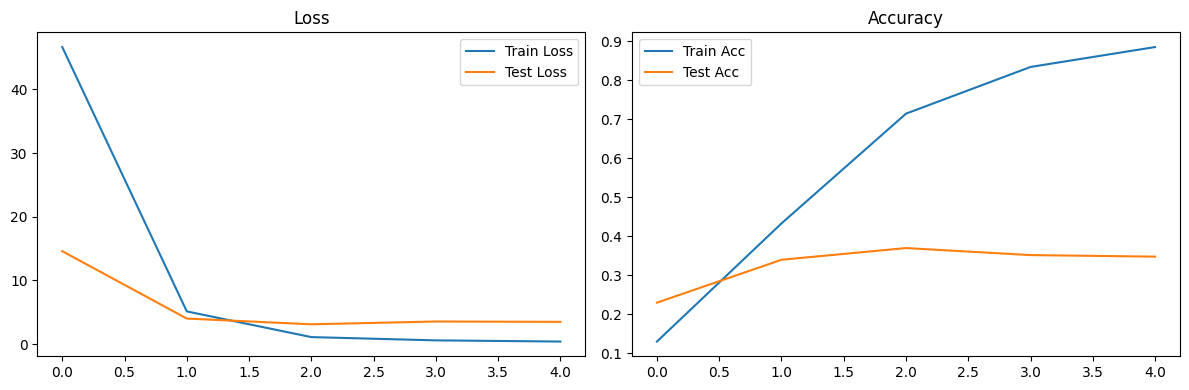


==== Запуск simple с глубиной 4 ====


100%|██████████| 16/16 [00:01<00:00,  9.99it/s]


Epoch 1/5:
Train Loss: 9.3205, Train Acc: 0.1111
Test Loss: 3.3149, Test Acc: 0.2380
--------------------------------------------------


100%|██████████| 16/16 [00:01<00:00,  9.41it/s]


Epoch 2/5:
Train Loss: 2.7646, Train Acc: 0.3272
Test Loss: 2.5329, Test Acc: 0.3740
--------------------------------------------------


100%|██████████| 16/16 [00:01<00:00,  9.57it/s]


Epoch 3/5:
Train Loss: 2.0155, Train Acc: 0.4853
Test Loss: 2.3321, Test Acc: 0.4040
--------------------------------------------------


100%|██████████| 16/16 [00:01<00:00,  9.88it/s]


Epoch 4/5:
Train Loss: 1.4211, Train Acc: 0.6236
Test Loss: 1.9654, Test Acc: 0.4720
--------------------------------------------------


100%|██████████| 16/16 [00:01<00:00,  9.82it/s]


Epoch 5/5:
Train Loss: 0.9232, Train Acc: 0.7444
Test Loss: 1.9976, Test Acc: 0.5080
--------------------------------------------------
Время обучения: 391.23 сек


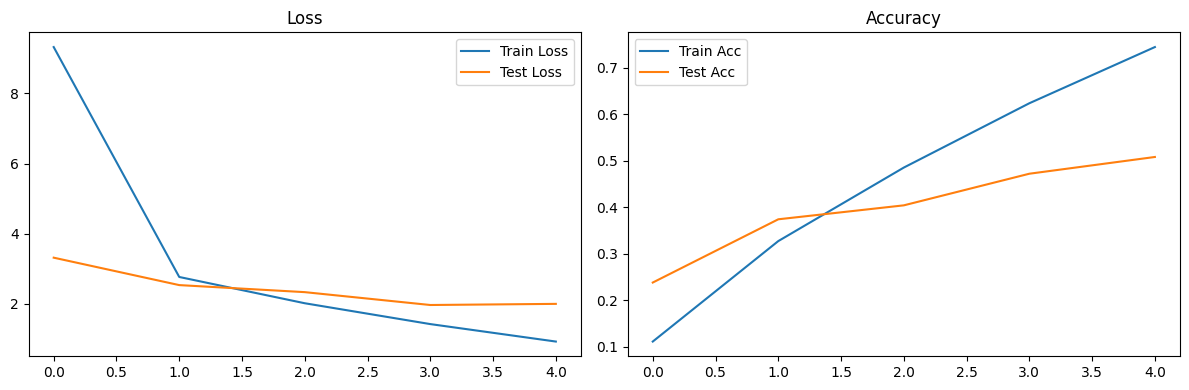


==== Запуск simple с глубиной 6 ====


100%|██████████| 16/16 [00:01<00:00,  9.03it/s]


Epoch 1/5:
Train Loss: 3.6222, Train Acc: 0.1780
Test Loss: 2.5872, Test Acc: 0.3480
--------------------------------------------------


100%|██████████| 16/16 [00:01<00:00,  8.30it/s]


Epoch 2/5:
Train Loss: 2.2808, Train Acc: 0.4102
Test Loss: 1.9654, Test Acc: 0.4660
--------------------------------------------------


100%|██████████| 16/16 [00:01<00:00,  9.12it/s]


Epoch 3/5:
Train Loss: 1.6456, Train Acc: 0.5584
Test Loss: 1.5984, Test Acc: 0.5540
--------------------------------------------------


100%|██████████| 16/16 [00:01<00:00, 10.60it/s]


Epoch 4/5:
Train Loss: 1.1807, Train Acc: 0.6700
Test Loss: 1.3738, Test Acc: 0.6300
--------------------------------------------------


100%|██████████| 16/16 [00:01<00:00,  9.66it/s]


Epoch 5/5:
Train Loss: 0.8143, Train Acc: 0.7692
Test Loss: 1.4486, Test Acc: 0.5960
--------------------------------------------------
Время обучения: 414.81 сек


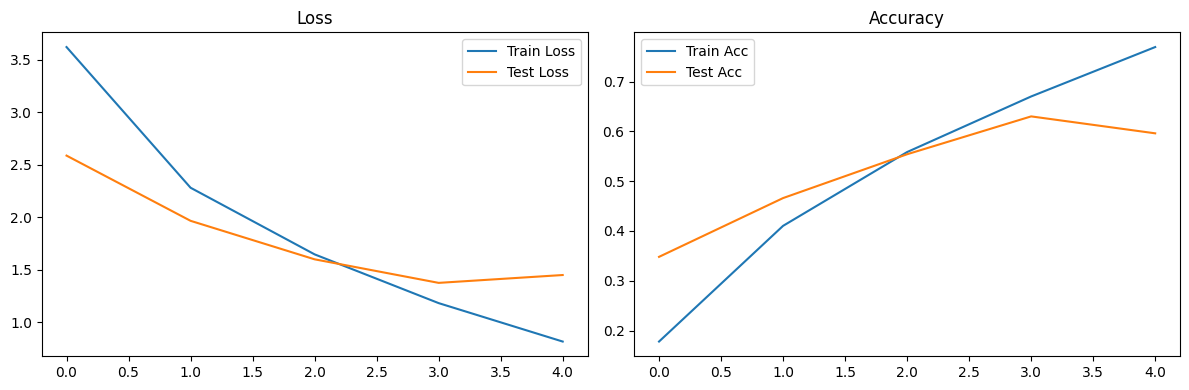


==== Запуск residual ====


100%|██████████| 16/16 [00:02<00:00,  6.94it/s]


Epoch 1/5:
Train Loss: 3.8334, Train Acc: 0.1064
Test Loss: 3.3211, Test Acc: 0.1880
--------------------------------------------------


100%|██████████| 16/16 [00:01<00:00,  8.03it/s]


Epoch 2/5:
Train Loss: 3.2423, Train Acc: 0.2072
Test Loss: 2.9860, Test Acc: 0.2580
--------------------------------------------------


100%|██████████| 16/16 [00:01<00:00,  8.03it/s]


Epoch 3/5:
Train Loss: 3.0080, Train Acc: 0.2543
Test Loss: 2.7801, Test Acc: 0.3160
--------------------------------------------------


100%|██████████| 16/16 [00:02<00:00,  7.30it/s]


Epoch 4/5:
Train Loss: 2.8348, Train Acc: 0.2895
Test Loss: 2.6347, Test Acc: 0.3700
--------------------------------------------------


100%|██████████| 16/16 [00:02<00:00,  7.49it/s]


Epoch 5/5:
Train Loss: 2.7075, Train Acc: 0.3212
Test Loss: 2.5560, Test Acc: 0.3860
--------------------------------------------------
Время обучения: 735.25 сек


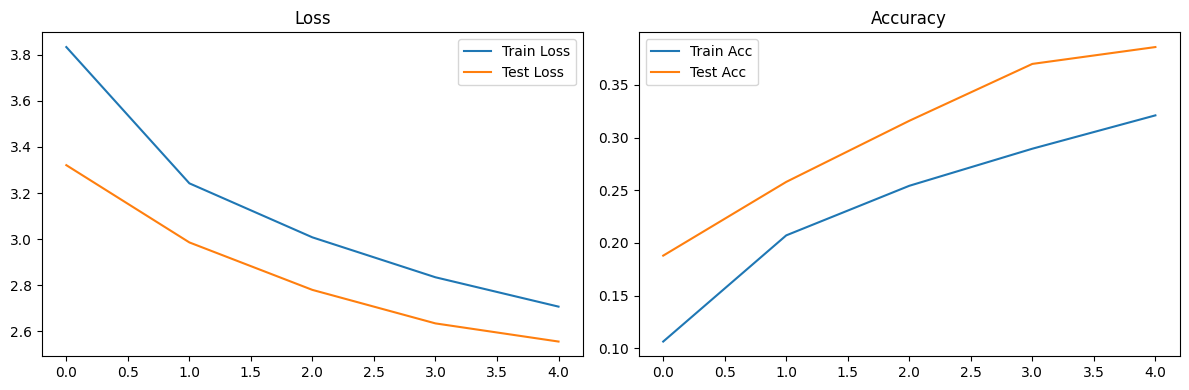

In [1]:
import time
import torch
from dataset import CustomImageDataset
from models import SimpleCNN, CNNWithResidual
from trainer import train_model
from utils import plot_training_history, count_parameters

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Параметры
num_epochs = 5
kernel_size = 3
num_classes = 100
batch_size = 32

#Подготовка
train_dataset = CustomImageDataset('data/train')
valid_dataset = CustomImageDataset('data/valid')
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

for depth in [2, 4, 6]:
    print(f"\n==== Запуск simple с глубиной {depth} ====")
    model = SimpleCNN(input_channels=3, num_classes=num_classes, num_layers=depth, kernel_size=kernel_size)
    model.to(device)
    
    start_time = time.time()
    history = train_model(model, train_loader, valid_loader, epochs=num_epochs, lr=0.001, device=device)
    end_time = time.time()

    tm = end_time - start_time
    print(f"Время обучения: {tm:.2f} сек")
    plot_path = f"plots/depth/simple_depth{depth}.png"
    plot_training_history(history, plot_path)

# Один раз обучаем residual
print(f"\n==== Запуск residual ====")
model = CNNWithResidual(input_channels=3, num_classes=num_classes, kernel_size=kernel_size)
model.to(device)

start_time = time.time()
history = train_model(model, train_loader, valid_loader, epochs=num_epochs, lr=0.001, device=device)
end_time = time.time()

tm = end_time - start_time
print(f"Время обучения: {tm:.2f} сек")
plot_path = f"plots/depth/residual.png"
plot_training_history(history, plot_path)

**Выбрали оптимальную глубину  равную 6, на которой были достигнуты лучшие метрики. Теперь проведём эксперименты с разными размерами ядра свёртки (3, 5, 7),**\
**чтобы определить лучший размера ядра на обучение.Количество эпох - 5. Графики сохранены в "plots\simple_cnn\kernel_sizes"**


==== Запуск SimpleCNN с глубиной 6 и kernel_size=3 ====


100%|██████████| 5/5 [00:00<00:00, 10.59it/s]


Epoch 1/5:
Train Loss: 2.6438, Train Acc: 0.2849
Test Loss: 2.0164, Test Acc: 0.4000
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00, 10.64it/s]


Epoch 2/5:
Train Loss: 1.7060, Train Acc: 0.4880
Test Loss: 1.9459, Test Acc: 0.3933
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  9.41it/s]


Epoch 3/5:
Train Loss: 1.3550, Train Acc: 0.5917
Test Loss: 1.4699, Test Acc: 0.5533
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00, 11.37it/s]


Epoch 4/5:
Train Loss: 1.0638, Train Acc: 0.6679
Test Loss: 1.3250, Test Acc: 0.5933
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00, 11.84it/s]


Epoch 5/5:
Train Loss: 0.7831, Train Acc: 0.7534
Test Loss: 1.8749, Test Acc: 0.5333
--------------------------------------------------
Время обучения: 109.13 сек


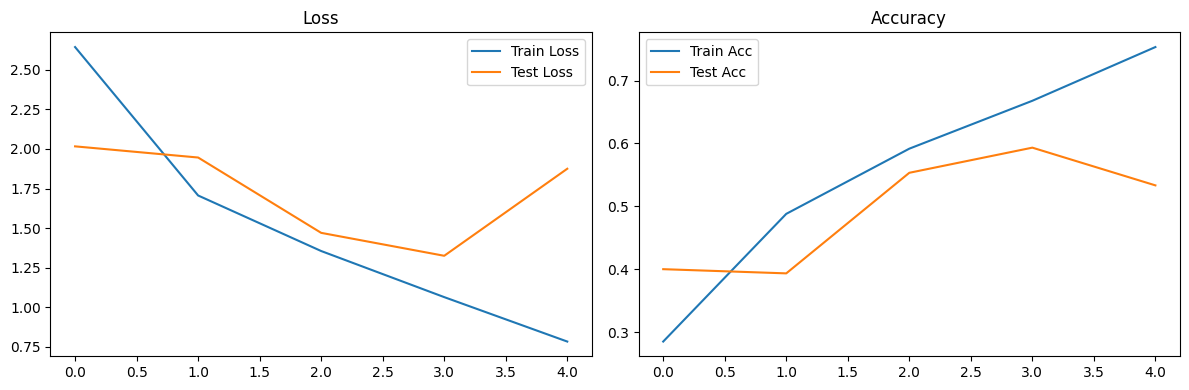


==== Запуск SimpleCNN с глубиной 6 и kernel_size=5 ====


100%|██████████| 5/5 [00:00<00:00, 10.21it/s]


Epoch 1/5:
Train Loss: 3.3564, Train Acc: 0.1324
Test Loss: 2.7538, Test Acc: 0.2400
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00, 10.28it/s]


Epoch 2/5:
Train Loss: 2.4071, Train Acc: 0.2996
Test Loss: 2.8023, Test Acc: 0.3067
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00, 10.49it/s]


Epoch 3/5:
Train Loss: 1.9702, Train Acc: 0.4098
Test Loss: 2.8806, Test Acc: 0.3067
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00, 10.61it/s]


Epoch 4/5:
Train Loss: 1.6202, Train Acc: 0.5185
Test Loss: 1.8159, Test Acc: 0.4600
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00, 10.40it/s]


Epoch 5/5:
Train Loss: 1.3787, Train Acc: 0.5735
Test Loss: 1.2082, Test Acc: 0.6533
--------------------------------------------------
Время обучения: 140.82 сек


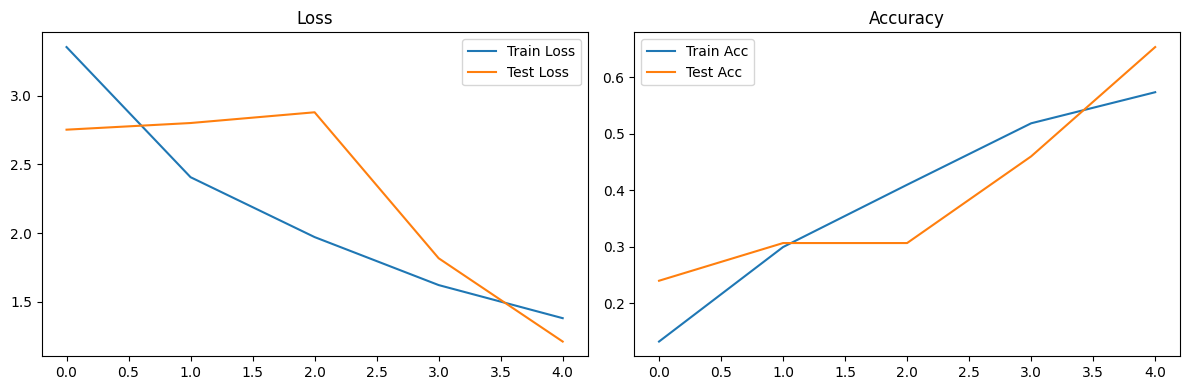


==== Запуск SimpleCNN с глубиной 6 и kernel_size=7 ====


100%|██████████| 5/5 [00:01<00:00,  4.31it/s]


Epoch 1/5:
Train Loss: 3.4333, Train Acc: 0.1000
Test Loss: 3.5833, Test Acc: 0.1133
--------------------------------------------------


100%|██████████| 5/5 [00:01<00:00,  4.78it/s]


Epoch 2/5:
Train Loss: 2.7886, Train Acc: 0.1814
Test Loss: 2.4711, Test Acc: 0.1800
--------------------------------------------------


100%|██████████| 5/5 [00:01<00:00,  4.67it/s]


Epoch 3/5:
Train Loss: 2.4248, Train Acc: 0.2856
Test Loss: 3.2892, Test Acc: 0.2067
--------------------------------------------------


100%|██████████| 5/5 [00:01<00:00,  4.68it/s]


Epoch 4/5:
Train Loss: 2.2326, Train Acc: 0.3468
Test Loss: 2.5896, Test Acc: 0.3133
--------------------------------------------------


100%|██████████| 5/5 [00:01<00:00,  4.66it/s]


Epoch 5/5:
Train Loss: 1.8913, Train Acc: 0.4335
Test Loss: 1.7244, Test Acc: 0.4533
--------------------------------------------------
Время обучения: 604.57 сек


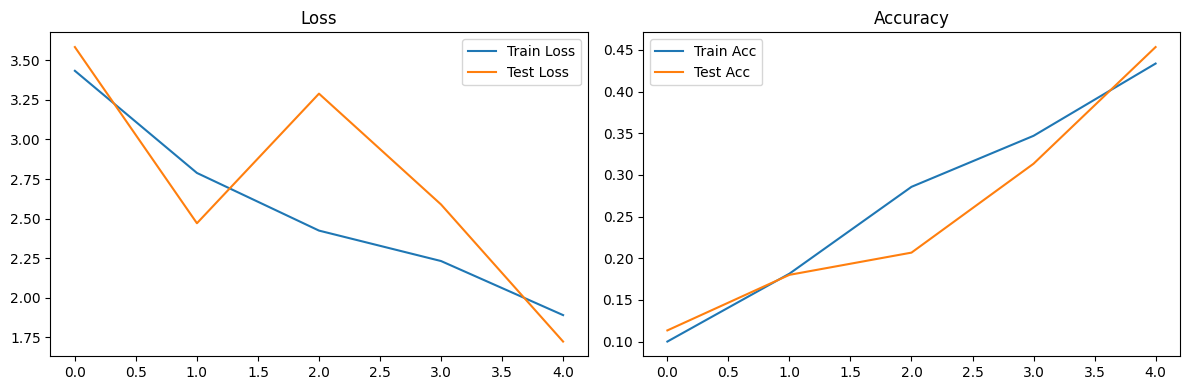

In [4]:
import time

depth = 6  # фиксируем оптимальную глубину по предыдущему эксперименту
num_epochs = 5

for kernel_size in [3, 5, 7]:
    print(f"\n==== Запуск SimpleCNN с глубиной {depth} и kernel_size={kernel_size} ====")
    
    model = SimpleCNN(
        input_channels=3,
        num_classes=num_classes,
        num_layers=depth,
        kernel_size=kernel_size
    )
    model.to(device)
    
    start_time = time.time()
    history = train_model(
        model, 
        train_loader, 
        valid_loader, 
        epochs=num_epochs, 
        lr=0.001, 
        device=device
    )
    end_time = time.time()
    
    tm = end_time - start_time
    print(f"Время обучения: {tm:.2f} сек")
    
    plot_path = f"plots/kernel_sizes/simple_depth{depth}_kernel{kernel_size}.png"
    plot_training_history(history, plot_path)

**По графикам видно, что лучшие результаты достигаются при размере ядра 5 и 7, но ядро 7 требует значительно больше времени на обучение.**\
**Поэтому оптимальным выбором является размер ядра 5.**\
**Далее модель была запущена на 50 эпохах с глубиной 6 и ядром 5 для оценки её устойчивости**.\
**График - "plots\simple_cnn\final_parametrs\cnn_without_aug_50epoch.png"**


==== запуск SimpleCNN: depth=6, kernel=5, epochs=50 ====


100%|██████████| 5/5 [00:00<00:00,  7.63it/s]


Epoch 1/50:
Train Loss: 3.3680, Train Acc: 0.1342
Test Loss: 3.4055, Test Acc: 0.2000
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  8.18it/s]


Epoch 2/50:
Train Loss: 2.3466, Train Acc: 0.3253
Test Loss: 2.1050, Test Acc: 0.4067
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  7.99it/s]


Epoch 3/50:
Train Loss: 1.9239, Train Acc: 0.4415
Test Loss: 2.4938, Test Acc: 0.3000
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  8.06it/s]


Epoch 4/50:
Train Loss: 1.5675, Train Acc: 0.5242
Test Loss: 1.4942, Test Acc: 0.5400
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  8.18it/s]


Epoch 5/50:
Train Loss: 1.2509, Train Acc: 0.6129
Test Loss: 1.1957, Test Acc: 0.6200
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  7.95it/s]


Epoch 6/50:
Train Loss: 1.1018, Train Acc: 0.6597
Test Loss: 2.9991, Test Acc: 0.3667
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  7.99it/s]


Epoch 7/50:
Train Loss: 0.8577, Train Acc: 0.7289
Test Loss: 1.6588, Test Acc: 0.5333
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  7.28it/s]


Epoch 8/50:
Train Loss: 0.7177, Train Acc: 0.7766
Test Loss: 1.6074, Test Acc: 0.5800
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  8.31it/s]


Epoch 9/50:
Train Loss: 0.6301, Train Acc: 0.8011
Test Loss: 1.0967, Test Acc: 0.6933
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  8.06it/s]


Epoch 10/50:
Train Loss: 0.4879, Train Acc: 0.8468
Test Loss: 1.1085, Test Acc: 0.6800
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  7.78it/s]


Epoch 11/50:
Train Loss: 0.3930, Train Acc: 0.8711
Test Loss: 1.1483, Test Acc: 0.7267
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  8.25it/s]


Epoch 12/50:
Train Loss: 0.2972, Train Acc: 0.9048
Test Loss: 1.5087, Test Acc: 0.6400
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  8.10it/s]


Epoch 13/50:
Train Loss: 0.1880, Train Acc: 0.9423
Test Loss: 1.0469, Test Acc: 0.7533
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  8.02it/s]


Epoch 14/50:
Train Loss: 0.1155, Train Acc: 0.9688
Test Loss: 1.1384, Test Acc: 0.7000
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  8.12it/s]


Epoch 15/50:
Train Loss: 0.1961, Train Acc: 0.9420
Test Loss: 1.1761, Test Acc: 0.6933
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  8.28it/s]


Epoch 16/50:
Train Loss: 0.0892, Train Acc: 0.9790
Test Loss: 1.5421, Test Acc: 0.6333
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  8.21it/s]


Epoch 17/50:
Train Loss: 0.2990, Train Acc: 0.9115
Test Loss: 1.3250, Test Acc: 0.6867
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  7.86it/s]


Epoch 18/50:
Train Loss: 0.2651, Train Acc: 0.9230
Test Loss: 2.8188, Test Acc: 0.5333
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  7.97it/s]


Epoch 19/50:
Train Loss: 0.1506, Train Acc: 0.9555
Test Loss: 0.9093, Test Acc: 0.7667
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  8.07it/s]


Epoch 20/50:
Train Loss: 0.0538, Train Acc: 0.9875
Test Loss: 0.8763, Test Acc: 0.7600
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  7.60it/s]


Epoch 21/50:
Train Loss: 0.0185, Train Acc: 0.9985
Test Loss: 0.9677, Test Acc: 0.7333
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  7.98it/s]


Epoch 22/50:
Train Loss: 0.0485, Train Acc: 0.9975
Test Loss: 1.0966, Test Acc: 0.7600
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  7.59it/s]


Epoch 23/50:
Train Loss: 0.3379, Train Acc: 0.9088
Test Loss: 1.1552, Test Acc: 0.7133
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  9.63it/s]


Epoch 24/50:
Train Loss: 0.2473, Train Acc: 0.9363
Test Loss: 1.3610, Test Acc: 0.6867
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  9.64it/s]


Epoch 25/50:
Train Loss: 0.1993, Train Acc: 0.9475
Test Loss: 1.1095, Test Acc: 0.7400
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  9.61it/s]


Epoch 26/50:
Train Loss: 0.0848, Train Acc: 0.9788
Test Loss: 1.6673, Test Acc: 0.6667
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  9.55it/s]


Epoch 27/50:
Train Loss: 0.0876, Train Acc: 0.9748
Test Loss: 1.0331, Test Acc: 0.7400
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  9.68it/s]


Epoch 28/50:
Train Loss: 0.0217, Train Acc: 0.9958
Test Loss: 1.0941, Test Acc: 0.7600
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  9.55it/s]


Epoch 29/50:
Train Loss: 0.0263, Train Acc: 0.9938
Test Loss: 0.9753, Test Acc: 0.7600
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  9.41it/s]


Epoch 30/50:
Train Loss: 0.0114, Train Acc: 0.9973
Test Loss: 1.1089, Test Acc: 0.7333
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  9.55it/s]


Epoch 31/50:
Train Loss: 0.0072, Train Acc: 0.9995
Test Loss: 0.9838, Test Acc: 0.7667
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  9.47it/s]


Epoch 32/50:
Train Loss: 0.0148, Train Acc: 0.9985
Test Loss: 1.0995, Test Acc: 0.7667
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  9.36it/s]


Epoch 33/50:
Train Loss: 0.2007, Train Acc: 0.9410
Test Loss: 1.3528, Test Acc: 0.6933
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  9.45it/s]


Epoch 34/50:
Train Loss: 0.0479, Train Acc: 0.9853
Test Loss: 1.3873, Test Acc: 0.7333
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  9.37it/s]


Epoch 35/50:
Train Loss: 0.0952, Train Acc: 0.9705
Test Loss: 1.0563, Test Acc: 0.7267
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  9.84it/s]


Epoch 36/50:
Train Loss: 0.0692, Train Acc: 0.9805
Test Loss: 1.2078, Test Acc: 0.7333
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  9.57it/s]


Epoch 37/50:
Train Loss: 0.0414, Train Acc: 0.9868
Test Loss: 1.3306, Test Acc: 0.7067
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  9.94it/s]


Epoch 38/50:
Train Loss: 0.0140, Train Acc: 0.9975
Test Loss: 1.1213, Test Acc: 0.7600
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00, 10.12it/s]


Epoch 39/50:
Train Loss: 0.0322, Train Acc: 0.9893
Test Loss: 1.2657, Test Acc: 0.7467
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00, 10.07it/s]


Epoch 40/50:
Train Loss: 0.0193, Train Acc: 0.9938
Test Loss: 1.3196, Test Acc: 0.7467
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00, 10.01it/s]


Epoch 41/50:
Train Loss: 0.0230, Train Acc: 0.9953
Test Loss: 1.1654, Test Acc: 0.7600
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00, 10.03it/s]


Epoch 42/50:
Train Loss: 0.1565, Train Acc: 0.9530
Test Loss: 2.1179, Test Acc: 0.6467
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00, 10.05it/s]


Epoch 43/50:
Train Loss: 0.1608, Train Acc: 0.9485
Test Loss: 1.3569, Test Acc: 0.7333
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00, 10.12it/s]


Epoch 44/50:
Train Loss: 0.0468, Train Acc: 0.9840
Test Loss: 1.2801, Test Acc: 0.7400
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00, 10.00it/s]


Epoch 45/50:
Train Loss: 0.0124, Train Acc: 0.9985
Test Loss: 1.1645, Test Acc: 0.7667
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00, 10.15it/s]


Epoch 46/50:
Train Loss: 0.0544, Train Acc: 0.9815
Test Loss: 1.2799, Test Acc: 0.7000
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00, 10.30it/s]


Epoch 47/50:
Train Loss: 0.0149, Train Acc: 0.9960
Test Loss: 1.0972, Test Acc: 0.8067
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00, 10.14it/s]


Epoch 48/50:
Train Loss: 0.0040, Train Acc: 0.9998
Test Loss: 1.0803, Test Acc: 0.7733
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00, 10.10it/s]


Epoch 49/50:
Train Loss: 0.0030, Train Acc: 0.9998
Test Loss: 1.0650, Test Acc: 0.7933
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00, 10.18it/s]


Epoch 50/50:
Train Loss: 0.0019, Train Acc: 1.0000
Test Loss: 1.1085, Test Acc: 0.7733
--------------------------------------------------
Время обучения: 1705.25 сек


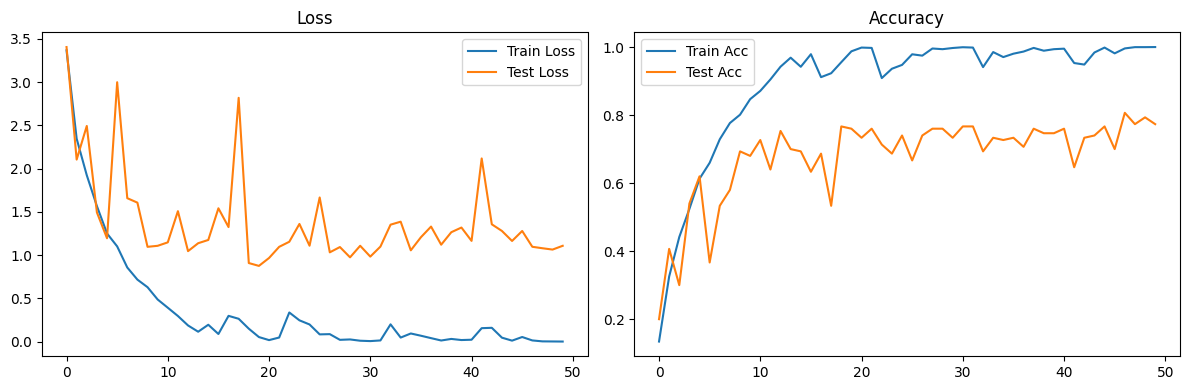

In [ ]:
num_epochs = 50
kernel_size = 5
depth = 6

print(f"\n==== запуск SimpleCNN: depth={depth}, kernel={kernel_size}, epochs={num_epochs} ====")

model = SimpleCNN(
    input_channels=3,
    num_classes=num_classes,
    num_layers=depth,
    kernel_size=kernel_size
)
model.to(device)

start_time = time.time()
history = train_model(
    model, 
    train_loader, 
    valid_loader, 
    epochs=num_epochs, 
    lr=0.001, 
    device=device
)
end_time = time.time()

tm = end_time - start_time
print(f"Время обучения: {tm:.2f} сек")

plot_path = f"plots/dep6_ker5/final_simple_depth{depth}_kernel{kernel_size}_50epochs.png"
plot_training_history(history, plot_path)

**По графику видно, что появилось переобучение. Поэтому добавим аугментацию.**\
**График - "plots\simple_cnn\final_parametrs\cnn_with_aug_40epoch.png"**

100%|██████████| 16/16 [00:07<00:00,  2.07it/s]


Epoch 1/40:
Train Loss: 10.1129, Train Acc: 0.0328
Test Loss: 4.1365, Test Acc: 0.0960
--------------------------------------------------


100%|██████████| 16/16 [00:05<00:00,  2.69it/s]


Epoch 2/40:
Train Loss: 3.9110, Train Acc: 0.1076
Test Loss: 3.2794, Test Acc: 0.2400
--------------------------------------------------


100%|██████████| 16/16 [00:05<00:00,  2.72it/s]


Epoch 3/40:
Train Loss: 3.4607, Train Acc: 0.1790
Test Loss: 2.9463, Test Acc: 0.2740
--------------------------------------------------


100%|██████████| 16/16 [00:05<00:00,  2.67it/s]


Epoch 4/40:
Train Loss: 3.1080, Train Acc: 0.2497
Test Loss: 2.6529, Test Acc: 0.3560
--------------------------------------------------


100%|██████████| 16/16 [00:06<00:00,  2.65it/s]


Epoch 5/40:
Train Loss: 2.8403, Train Acc: 0.2989
Test Loss: 2.3158, Test Acc: 0.4200
--------------------------------------------------


100%|██████████| 16/16 [00:05<00:00,  2.67it/s]


Epoch 6/40:
Train Loss: 2.6185, Train Acc: 0.3436
Test Loss: 2.1938, Test Acc: 0.4060
--------------------------------------------------


100%|██████████| 16/16 [00:06<00:00,  2.64it/s]


Epoch 7/40:
Train Loss: 2.4080, Train Acc: 0.3893
Test Loss: 2.2709, Test Acc: 0.4220
--------------------------------------------------


100%|██████████| 16/16 [00:06<00:00,  2.64it/s]


Epoch 8/40:
Train Loss: 2.2312, Train Acc: 0.4343
Test Loss: 1.8508, Test Acc: 0.4960
--------------------------------------------------


100%|██████████| 16/16 [00:05<00:00,  2.72it/s]


Epoch 9/40:
Train Loss: 2.0643, Train Acc: 0.4682
Test Loss: 1.6756, Test Acc: 0.5640
--------------------------------------------------


100%|██████████| 16/16 [00:05<00:00,  2.75it/s]


Epoch 10/40:
Train Loss: 1.9489, Train Acc: 0.4944
Test Loss: 1.6949, Test Acc: 0.5460
--------------------------------------------------


100%|██████████| 16/16 [00:06<00:00,  2.63it/s]


Epoch 11/40:
Train Loss: 1.8115, Train Acc: 0.5240
Test Loss: 1.7006, Test Acc: 0.5220
--------------------------------------------------


100%|██████████| 16/16 [00:05<00:00,  2.68it/s]


Epoch 12/40:
Train Loss: 1.7268, Train Acc: 0.5435
Test Loss: 1.4848, Test Acc: 0.6060
--------------------------------------------------


100%|██████████| 16/16 [00:06<00:00,  2.61it/s]


Epoch 13/40:
Train Loss: 1.5916, Train Acc: 0.5753
Test Loss: 1.5698, Test Acc: 0.5840
--------------------------------------------------


100%|██████████| 16/16 [00:06<00:00,  2.63it/s]


Epoch 14/40:
Train Loss: 1.5032, Train Acc: 0.5940
Test Loss: 1.4131, Test Acc: 0.6180
--------------------------------------------------


100%|██████████| 16/16 [00:05<00:00,  2.69it/s]


Epoch 15/40:
Train Loss: 1.4236, Train Acc: 0.6164
Test Loss: 1.4966, Test Acc: 0.5880
--------------------------------------------------


100%|██████████| 16/16 [00:06<00:00,  2.65it/s]


Epoch 16/40:
Train Loss: 1.3225, Train Acc: 0.6372
Test Loss: 1.2999, Test Acc: 0.6400
--------------------------------------------------


100%|██████████| 16/16 [00:05<00:00,  2.70it/s]


Epoch 17/40:
Train Loss: 1.2544, Train Acc: 0.6546
Test Loss: 1.3440, Test Acc: 0.6620
--------------------------------------------------


100%|██████████| 16/16 [00:06<00:00,  2.63it/s]


Epoch 18/40:
Train Loss: 1.1720, Train Acc: 0.6771
Test Loss: 1.3413, Test Acc: 0.6420
--------------------------------------------------


100%|██████████| 16/16 [00:05<00:00,  2.69it/s]


Epoch 19/40:
Train Loss: 1.0942, Train Acc: 0.6910
Test Loss: 1.2053, Test Acc: 0.6760
--------------------------------------------------


100%|██████████| 16/16 [00:05<00:00,  2.68it/s]


Epoch 20/40:
Train Loss: 1.0631, Train Acc: 0.7022
Test Loss: 1.2530, Test Acc: 0.6660
--------------------------------------------------


100%|██████████| 16/16 [00:05<00:00,  2.69it/s]


Epoch 21/40:
Train Loss: 1.0053, Train Acc: 0.7159
Test Loss: 1.3651, Test Acc: 0.6280
--------------------------------------------------


100%|██████████| 16/16 [00:05<00:00,  2.71it/s]


Epoch 22/40:
Train Loss: 0.9427, Train Acc: 0.7290
Test Loss: 1.4161, Test Acc: 0.6380
--------------------------------------------------


100%|██████████| 16/16 [00:05<00:00,  2.72it/s]


Epoch 23/40:
Train Loss: 0.9079, Train Acc: 0.7414
Test Loss: 1.3597, Test Acc: 0.6220
--------------------------------------------------


100%|██████████| 16/16 [00:05<00:00,  2.68it/s]


Epoch 24/40:
Train Loss: 0.8482, Train Acc: 0.7529
Test Loss: 1.3131, Test Acc: 0.6380
--------------------------------------------------


100%|██████████| 16/16 [00:05<00:00,  2.69it/s]


Epoch 25/40:
Train Loss: 0.8006, Train Acc: 0.7650
Test Loss: 1.3384, Test Acc: 0.6640
--------------------------------------------------


100%|██████████| 16/16 [00:05<00:00,  2.72it/s]


Epoch 26/40:
Train Loss: 0.7733, Train Acc: 0.7754
Test Loss: 1.2462, Test Acc: 0.6740
--------------------------------------------------


100%|██████████| 16/16 [00:05<00:00,  2.72it/s]


Epoch 27/40:
Train Loss: 0.7582, Train Acc: 0.7819
Test Loss: 1.2321, Test Acc: 0.6760
--------------------------------------------------


100%|██████████| 16/16 [00:05<00:00,  2.72it/s]


Epoch 28/40:
Train Loss: 0.7216, Train Acc: 0.7927
Test Loss: 1.3266, Test Acc: 0.6460
--------------------------------------------------


100%|██████████| 16/16 [00:05<00:00,  2.70it/s]


Epoch 29/40:
Train Loss: 0.6800, Train Acc: 0.8008
Test Loss: 1.2422, Test Acc: 0.6520
--------------------------------------------------


100%|██████████| 16/16 [00:05<00:00,  2.70it/s]


Epoch 30/40:
Train Loss: 0.6592, Train Acc: 0.8061
Test Loss: 1.1993, Test Acc: 0.6820
--------------------------------------------------


100%|██████████| 16/16 [00:06<00:00,  2.65it/s]


Epoch 31/40:
Train Loss: 0.6441, Train Acc: 0.8099
Test Loss: 1.2295, Test Acc: 0.6880
--------------------------------------------------


100%|██████████| 16/16 [00:05<00:00,  2.69it/s]


Epoch 32/40:
Train Loss: 0.6051, Train Acc: 0.8203
Test Loss: 1.4142, Test Acc: 0.6580
--------------------------------------------------


100%|██████████| 16/16 [00:06<00:00,  2.63it/s]


Epoch 33/40:
Train Loss: 0.6064, Train Acc: 0.8205
Test Loss: 1.4041, Test Acc: 0.6640
--------------------------------------------------


100%|██████████| 16/16 [00:06<00:00,  2.65it/s]


Epoch 34/40:
Train Loss: 0.5788, Train Acc: 0.8279
Test Loss: 1.1390, Test Acc: 0.7140
--------------------------------------------------


100%|██████████| 16/16 [00:05<00:00,  2.72it/s]


Epoch 35/40:
Train Loss: 0.5581, Train Acc: 0.8355
Test Loss: 1.2820, Test Acc: 0.6980
--------------------------------------------------


100%|██████████| 16/16 [00:05<00:00,  2.71it/s]


Epoch 36/40:
Train Loss: 0.5470, Train Acc: 0.8373
Test Loss: 1.2748, Test Acc: 0.7020
--------------------------------------------------


100%|██████████| 16/16 [00:06<00:00,  2.58it/s]


Epoch 37/40:
Train Loss: 0.5240, Train Acc: 0.8427
Test Loss: 1.2963, Test Acc: 0.7100
--------------------------------------------------


100%|██████████| 16/16 [00:06<00:00,  2.61it/s]


Epoch 38/40:
Train Loss: 0.5058, Train Acc: 0.8462
Test Loss: 1.3877, Test Acc: 0.6760
--------------------------------------------------


100%|██████████| 16/16 [00:05<00:00,  2.70it/s]


Epoch 39/40:
Train Loss: 0.5104, Train Acc: 0.8437
Test Loss: 1.2510, Test Acc: 0.7040
--------------------------------------------------


100%|██████████| 16/16 [00:06<00:00,  2.61it/s]


Epoch 40/40:
Train Loss: 0.4794, Train Acc: 0.8529
Test Loss: 1.5589, Test Acc: 0.6720
--------------------------------------------------

Время обучения: 3155.28 секунд


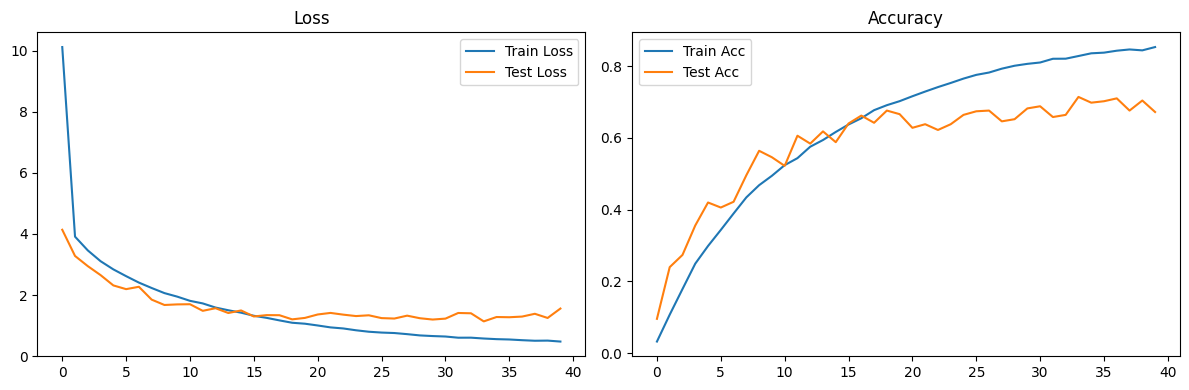

In [1]:
import torch
from torch.utils.data import DataLoader
from dataset import CustomImageDataset
from models import SimpleCNN
from trainer import train_model
from utils import plot_training_history
import time

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_classes = 100
batch_size = 32
num_epochs = 40
kernel_size = 5
depth = 4
input_size = (224, 224)

# Создание датасетов с аугментацией для train
train_dataset = CustomImageDataset(root_dir='data/train', is_aug=True, target_size=input_size)
valid_dataset = CustomImageDataset(root_dir='data/valid', is_aug=False, target_size=input_size)

# Даталоадеры
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)

# Модель
model = SimpleCNN(
    input_channels=3,
    num_classes=num_classes,
    num_layers=depth,
    kernel_size=kernel_size,
    input_size=input_size
).to(device)

# Запуск обучения
start_time = time.time()
history = train_model(
    model=model,
    train_loader=train_loader,
    test_loader=valid_loader,
    epochs=num_epochs,
    lr=0.001,
    device=device
)
end_time = time.time()
tm = end_time - start_time

print(f"\nВремя обучения: {tm:.2f} секунд")

# Сохранение графика
plot_training_history(history, save_path=f"plots/dep6_ker5/cnn_with_aug_40epoch.png")